### 2.1 Visualisation of night-time site density (per km)

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [2]:
# Load the data
msoa_boundary = gpd.read_file('MSOA_2011_London_gen_MHW.shp')  
nighttime_stops_msoa = pd.read_csv('MSOA_nighttime_stops.csv')  

In [3]:
# Calculating the area for each MSOA region in square kilometers
msoa_boundary['area_sq_km'] = msoa_boundary.to_crs(epsg=27700).area / 1e6

In [4]:
# Merging the nighttime stops data with the MSOA boundary data
merged_data = msoa_boundary.merge(nighttime_stops_msoa, left_on='MSOA11CD', right_on='MSOA11CD', how='left')
merged_data['NUMPOINTS'].fillna(0, inplace=True)  # Handling NaN values

# Calculating the stop density per square kilometer
merged_data['stop_density_per_sq_km'] = merged_data['NUMPOINTS'] / merged_data['area_sq_km']

In [5]:
# Defining discrete intervals for stop density
density_bins = [0, 1, 5, 10, 15, 20, 30, 40, max(merged_data['stop_density_per_sq_km'])]
merged_data['density_category'] = pd.cut(merged_data['stop_density_per_sq_km'], bins=density_bins, include_lowest=True)

# Creating a custom color map
cmap = plt.cm.Reds
colors = ['white'] + [cmap(i / (len(density_bins) - 2)) for i in range(len(density_bins) - 2)]

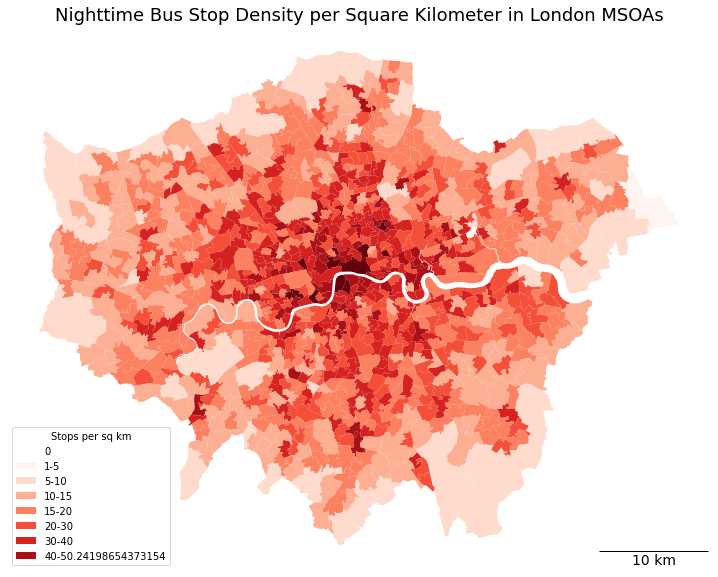

In [6]:
# Creating the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='density_category', categorical=True, cmap=cmap, legend=False, ax=ax)

# Adding custom legend
legend_labels = ['0'] + [f'{density_bins[i]}-{density_bins[i+1]}' for i in range(1, len(density_bins)-1)]
legend_patches = [Patch(facecolor=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
ax.legend(handles=legend_patches, title='Stops per sq km', loc='lower left')

# Add a scale bar for 10 kilometers
scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fm.FontProperties(size=14))

ax.add_artist(scalebar)

# Setting title and removing axis
ax.axis('off')
ax.set_title("Nighttime Bus Stop Density per Square Kilometer in London MSOAs", fontsize=18)

plt.show()